In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#**********    Function 03     ***********
f  = lambda w: (w[0]-2)**2 + (w[1]-3)**2
df = lambda w: np.array([2*(w[0]-2) , 2*(w[1]-3)])
min_w, max_w, = -100, 100

w0 =[min_w + np.random.rand()*(max_w-min_w),
     min_w + np.random.rand()*(max_w-min_w)]

initial_position = np.array(w0)
learning_rate = 0.1 #find a good value for learning rate

In [3]:
#settings
max_iter = 200
precision  =0.00001
history=[]
change_f = float('inf')
iteration=0

In [4]:
def gradient_descent_step(df,learning_rate,current_position):

    # *****START OF YOUR DOCUMENTATION (DO NOT DELETE/MODIFY THIS LINE)*****  
    """
    Calculates a step of the gradient descent of a given function.
    Inputs:
        df: The first derivativ of the function for which the gradient descent is to be computed. 
        learning rate: A float value which is - 0<learning_rate<1. Defines the size of each step.
        current_position: The current value for all variables of the function. Given as a ndarray.
    Outputs:
        new_position: The value for all variables of the function after the step. Shape is equal to current_position.
    """
    # *****END OF YOUR DOCUMENTATION (DO NOT DELETE/MODIFY THIS LINE)*******

    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    new_position = current_position-learning_rate*df(current_position)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    return new_position

In [5]:
def update_history(history,f,current_position,change_f):
    
    # *****START OF YOUR DOCUMENTATION (DO NOT DELETE/MODIFY THIS LINE)*****  
    """
    Appends the history list with a nested list containing the current position of all variables,
    the value of f(current_position) and the diffrence between f(current_position) and f(current_position-1)
    Inputs:
        history: History is a list, containing an element for each step of gradient descent.
        The element defines the current position of all variables,
        the value of f(current_position) and the diffrence between f(current_position) and f(current_position-1)
        f: is given as a float value and is the f(current_position)
        current_position: defines the current value off all variables of the function f. Given as a ndarry.
        change_f: diffrence between f(current_position) and f(current_position-1). Given as a float.
    Outputs:
        history: The function outputs the same list as given in the input, appended with 1 element.
    """
    # *****END OF YOUR DOCUMENTATION (DO NOT DELETE/MODIFY THIS LINE)*******

    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    element = (current_position,f,change_f)
    history.append(element)
    return history

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [6]:
current_position = initial_position
update_history(history,f,current_position,change_f)

while ((iteration<=max_iter) & (np.abs(change_f)>precision)):

    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    new_position = gradient_descent_step(df,learning_rate,current_position)
    change_f = f(current_position)-f(new_position)
    
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*******
    
    # after computing the new_position, we should update our variables
    iteration += 1

    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    current_position = new_position
    current_f = f(current_position)
    update_history(history,current_f,current_position,change_f)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*******


<ipython-input-17-eb55243538c4>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np_history =np.array(history)


(100, 100)
THIS IS Y
(100, 100)
THIS IS Z!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
(100, 100)


<bound method Figure.show of <Figure size 432x288 with 2 Axes>>

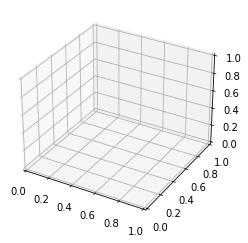

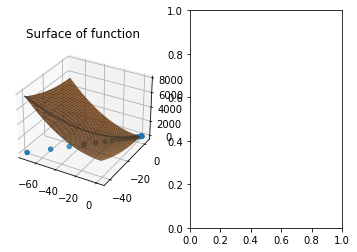

In [17]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
np_history =np.array(history)
#i=np.arange(len(history)-1)
xy_positions = np_history[1:,0]
x_values=np.zeros(len(xy_positions))
y_values=np.zeros(len(xy_positions))

for counter in range(len(xy_positions)):
    x_values[counter]=(xy_positions[counter])[0]
    y_values[counter]=(xy_positions[counter])[1]
z_values= np_history[1:,1]

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

#plot f(x,y) as surface for x any y between max and min.
#diff_x, diff_y = np.mgrid[min(x_values)-10:max(x_values)+10:30j, min(y_values)-10:max(y_values)+10:30j]
diff_x= np.arange(min(x_values),max(x_values),(max(x_values)-min(x_values))/100)
diff_y= np.arange(min(y_values),max(y_values),(max(y_values)-min(y_values))/100)
diff_x, diff_y = np.meshgrid(diff_x, diff_y)
print(diff_x.shape)
print('THIS IS Y')
print(diff_y.shape)


z = f([diff_x,diff_y])
print('THIS IS Z!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print(z.shape)

ax.plot(x_values,y_values,z_values)
#ax.scatter(x_values,y_values,z_values)
ax.scatter(x_values,y_values,0)

ax.plot_surface(diff_x,diff_y,z)
#ax.contour(diff_x,diff_y,z,20,cmap='viridis',linestyles='solid', offset=-1)
ax.set_title('Surface of function')

fig.show
